In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('heart_cleveland_upload.csv')

df = data.copy()
print(df.shape)
df.head()

(297, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


int64      13
float64     1
Name: count, dtype: int64


<Axes: ylabel='count'>

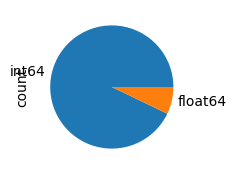

In [2]:
print(df.dtypes.value_counts())
plt.figure(figsize=(2,2))
df.dtypes.value_counts().plot.pie()

age          0.0
sex          0.0
cp           0.0
trestbps     0.0
chol         0.0
fbs          0.0
restecg      0.0
thalach      0.0
exang        0.0
oldpeak      0.0
slope        0.0
ca           0.0
thal         0.0
condition    0.0
dtype: float64


<Axes: >

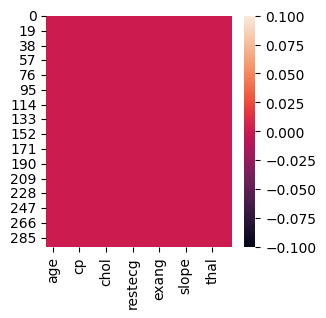

In [3]:
print((df.isna().sum()/df.shape[0]).sort_values())
plt.figure(figsize=(3,3))
sns.heatmap(df.isna())

In [4]:
df['condition'].value_counts()

condition
0    160
1    137
Name: count, dtype: int64

<Figure size 200x200 with 0 Axes>

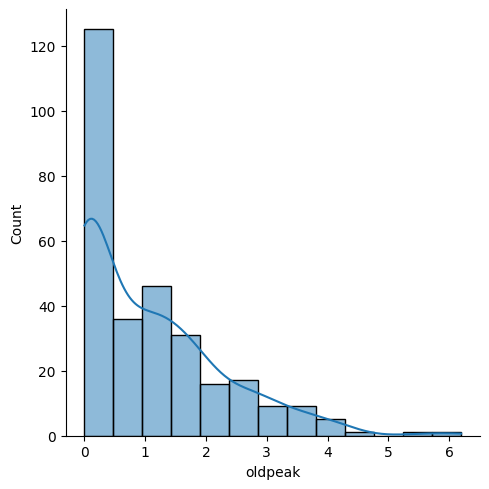

In [5]:
for col in df.select_dtypes('float') :
    plt.figure(figsize=(2,2))
    sns.displot(df[col], kde=True)
    

C:\Users\T\AppData\Local\Temp\ipykernel_4976\2658976679.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(positive_df[col], label='positif')


C:\Users\T\AppData\Local\Temp\ipykernel_4976\2658976679.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(negative_df[col], label='negatif')
C:\Users\T\AppData\Local\Temp\ipykernel_4976\2658976679.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(positive_df[col], label='positif')
C:\Users\T

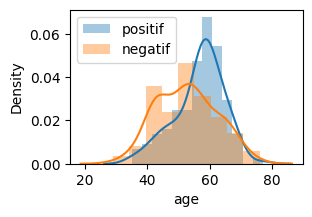

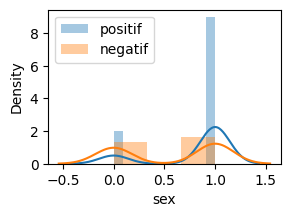

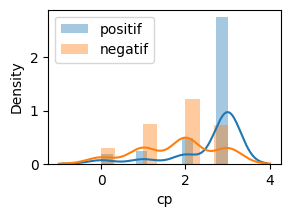

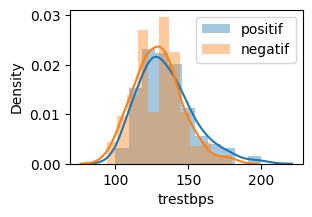

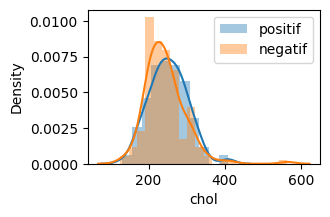

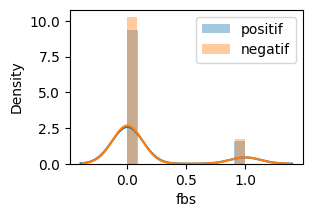

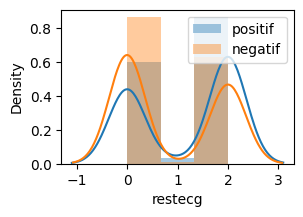

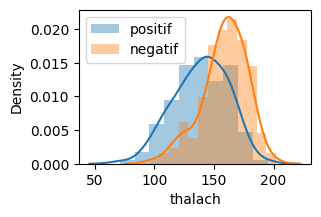

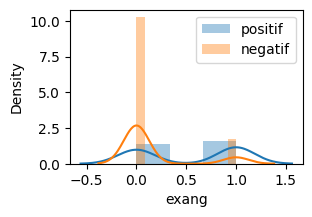

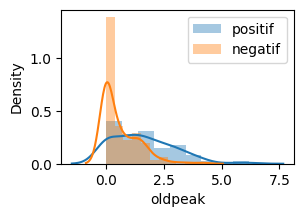

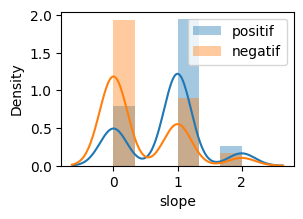

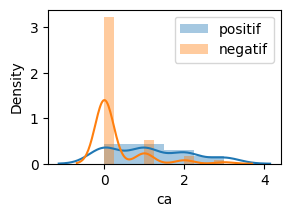

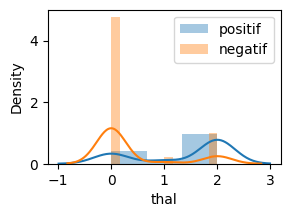

In [6]:
positive_df = df[df['condition'] == 1]
negative_df = df[df['condition'] == 0]
X_df = df.drop('condition', axis = 1)

for col in X_df :
    plt.figure(figsize=(3,2))
    sns.distplot(positive_df[col], label='positif')
    sns.distplot(negative_df[col], label='negatif')
    plt.legend()

<Axes: xlabel='age', ylabel='count'>

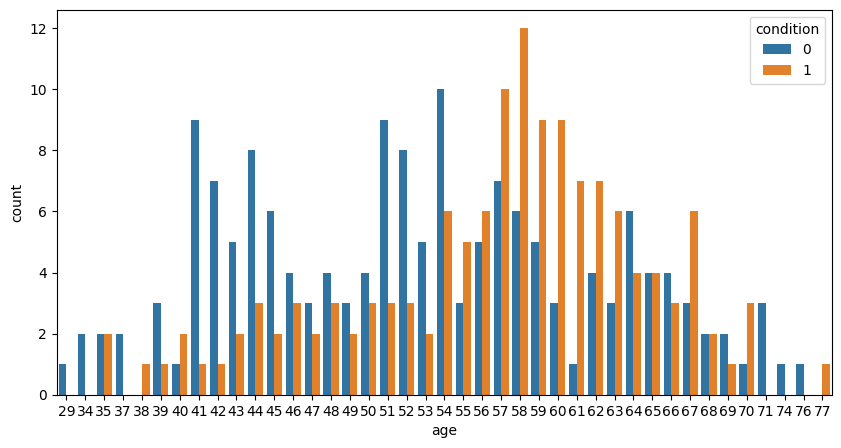

In [7]:
plt.figure(figsize=(10,5))
sns.countplot(x='age',hue='condition', data=df)

<Axes: >

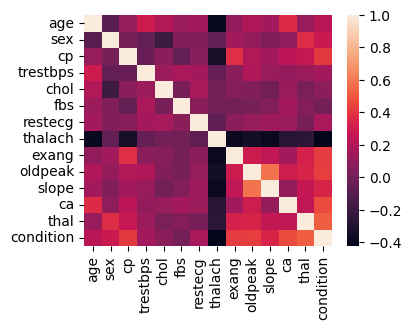

In [8]:
plt.figure(figsize=(4,3))
sns.heatmap(df.corr())

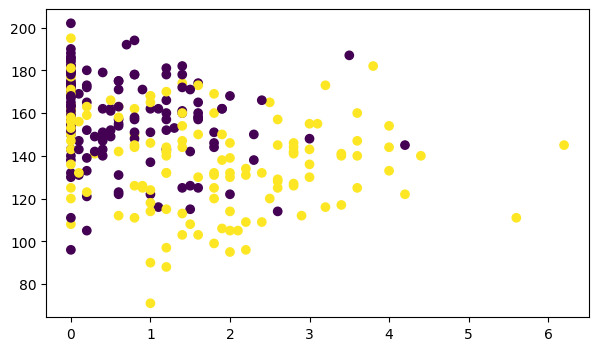

In [9]:
plt.figure(figsize=(7,4))
plt.scatter(df['oldpeak'],df['thalach'], c=df['condition'])

In [10]:
from sklearn.model_selection import train_test_split,learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel,f_classif
from sklearn.metrics import f1_score, confusion_matrix,classification_report

In [11]:
def inputation(dataset) :
    return dataset.drop(['sex','fbs','restecg','exang','slope'], axis=1)

def preprocessing(dataset) :
    # dataset = inputation(dataset)
    X = dataset.drop('condition',axis = 1)
    y = dataset['condition']

    return X,y

trainset, testset = train_test_split(df,test_size = 0.2,random_state = 0)

X_train,y_train = preprocessing(trainset)
X_test,y_test = preprocessing(testset)

In [12]:
def evaluation(model) :
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
    N, train_score, val_score = learning_curve(model, X_train, y_train, cv=4,train_sizes=np.linspace(0.1,1.0,10),scoring='f1')
                                               
    plt.figure(figsize=(8,4))
    plt.plot(N, train_score.mean(axis=1), label='train_score')
    plt.plot(N, val_score.mean(axis=1), label='val_score')
    plt.legend()

[[20  2]
 [13 25]]
              precision    recall  f1-score   support

           0       0.61      0.91      0.73        22
           1       0.93      0.66      0.77        38

    accuracy                           0.75        60
   macro avg       0.77      0.78      0.75        60
weighted avg       0.81      0.75      0.75        60



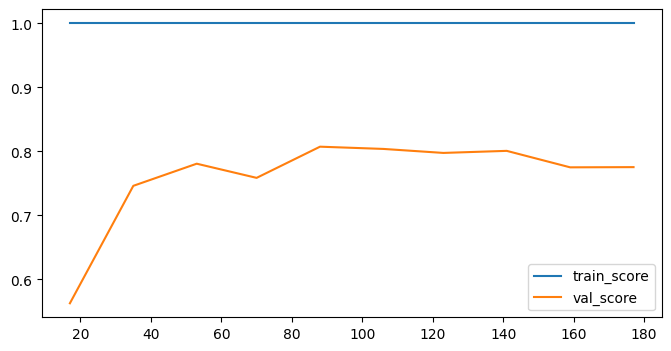

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest,f_classif

model = make_pipeline(SelectKBest(f_classif, k=10),RandomForestClassifier(random_state = 0))

evaluation(model)

In [14]:
# pd.DataFrame(model.feature_importances_,index=X_train.columns)


AttributeError: 'Pipeline' object has no attribute 'feature_importances_'

: 